<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/04_2_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#SGD Classifier

In [6]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [9]:
# X, y 데이터를 만들기

fish_input = fish.drop('Species', axis=1).to_numpy() #교재의 직접 치는 코드보다 깔끔
fish_target = fish['Species'].to_numpy()

In [12]:
# 미리 확인해서 복붙해 넣을 수 있음
# 하지만, 실제 프로젝트에서는 feature의 수가 아주 많으므로 권장하지 않음
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [10]:
# 반드시 shape 확인
fish_input.shape, fish_target.shape

((159, 5), (159,))

In [11]:
# train/test set 만들기  = X, X, y, y 순서 주의
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [13]:
# shqpe 확인
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((119, 5), (40, 5), (119,), (40,))

In [21]:
# 전처리 과정으로 변환기를 이용한 스케일링 진행

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

In [30]:
# 확률적 경사하강법을 적용
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', random_state=42, max_iter=10, verbose=1) # 이런 식으로 직접 지정한 변수값 = hyper parameter
# default : loss='hinge' , max_iter=1000,

# l1_ratio=0.15 (elastic 유연함 정도 -> 릿지 %, 라쏘 % 비율로 섞는것) -> l2 = 0.85 자동으로 설정

# learning_rate='optimal' epoch 이동 step 정도를 알아서 설정

# early_stopping=False 조기 종료 : 모델이 과적합되기 전 훈련을 멈추는 정규화 기법
#   best 20epoch에서 끝나는데 100까지 진행해버리면 overfit가 될 수 있음 -> 미리 끝낼 수 있으면 좋다(신경망에서 자주 쓰임)
#   훈련 점수와 테스트 점수를 비교해 봐야 함

# validation_fraction=0.1

# verbose=0 -> 1이면 진행과정이 모두 출력됨
# The verbosity level. loss가 커졌다 줄어들었다 왔다갔다 체크하면서 진행됨

sc.fit(train_scaled, train_target)

# 정답과 예측한 클래스로 모형을 평가하기
print(accuracy_score(train_target, sc.predict(train_scaled)))
print(accuracy_score(test_target, sc.predict(test_scaled)))

# 전체적으로 점수가 낮고, train이 조금 더 높은 상태 = underfit
# 현재까지의 코드 = 1epoch

-- Epoch 1
Norm: 46.61, NNZs: 5, Bias: -27.661813, T: 119, Avg. loss: 1.267821
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43.85, NNZs: 5, Bias: -26.602025, T: 238, Avg. loss: 0.058223
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 40.77, NNZs: 5, Bias: -26.081781, T: 357, Avg. loss: 0.005956
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 37.12, NNZs: 5, Bias: -26.815303, T: 476, Avg. loss: 0.002337
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 37.08, NNZs: 5, Bias: -23.088176, T: 595, Avg. loss: 0.008068
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 35.10, NNZs: 5, Bias: -22.612781, T: 714, Avg. loss: 0.006196
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 32.38, NNZs: 5, Bias: -23.422639, T: 833, Avg. loss: 0.002355
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 32.87, NNZs: 5, Bias: -20.275578, T: 952, Avg. loss: 0.009796
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 30.59, NNZs: 5, Bias: -21.305400, T: 1071, Avg. loss: 0.007107
Total tr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


In [35]:
# fit는 학습을 초기화하고 시작
# partial_fit 로 점진적 학습을 시키자
# 전체 데이터 세트로 모델을 다시 훈련시키는 대신에 
# 모델의 과거 학습이 복원되고 동일한 모델이 새로운 데이터 배치로 훈련되는 증분 학습 접근 방식을 사용

# 부족한 학습 반복 횟수를 채운다

sc.partial_fit(train_scaled, train_target, classes = np.unique(train_target)) # 1에포크씩 이어서 훈련?
# classes 주면 결과값 변동됨
print(accuracy_score(train_target, sc.predict(train_scaled)))
print(accuracy_score(test_target, sc.predict(test_scaled)))

-- Epoch 1
Norm: 27.51, NNZs: 5, Bias: -17.476996, T: 119, Avg. loss: 0.008799
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 55.54, NNZs: 5, Bias: -36.634579, T: 119, Avg. loss: 0.271077
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 72.14, NNZs: 5, Bias: -17.498909, T: 119, Avg. loss: 1.940904
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 27.91, NNZs: 5, Bias: -27.128142, T: 119, Avg. loss: 0.001438
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 55.05, NNZs: 5, Bias: -16.271966, T: 119, Avg. loss: 1.121726
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 41.80, NNZs: 5, Bias: -61.994395, T: 119, Avg. loss: 0.443426
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 21.17, NNZs: 5, Bias: -15.827010, T: 119, Avg. loss: 0.330491
Total training time: 0.00 seconds.
0.8571428571428571
0.9


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished


#에포크와 언더피트/오버피트 관계

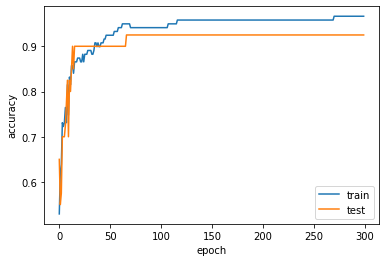

In [39]:
sc = SGDClassifier(loss='log', random_state=42)
classes = np.unique(train_target) #루프 안에 넣으면 이게 300번이나 호출되므로 바깥으로 빼두자
train_score, test_score = [], []

for _ in range(300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(accuracy_score(train_target, sc.predict(train_scaled)))
  test_score.append(accuracy_score(test_target, sc.predict(test_scaled)))

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

# test가 역전하기 이전은 underfit

In [44]:
sc = SGDClassifier(loss='log',max_iter=100, tol=None, random_state=42)
# tol=0.001 tolerance 에포크당 이전 결과와의 loss손실값 차이가 0.001 이상 나지 않으면 진행 멈추기
#           이걸 None으로 했으니, max_iter까지 무조건 가겠다고 설정한 것
sc.fit(train_scaled, train_target)

print(accuracy_score(train_target, sc.predict(train_scaled)))
print(accuracy_score(test_target, sc.predict(test_scaled)))

# 점수 높음!
# max_iter=110 값을 조절해보면서 best값을 찾아낼 수 있다

0.957983193277311
0.925


In [45]:
from sklearn.linear_model import SGDRegressor
# 참고
# ?SGDRegressor
# SGDRegressor(*args, **kwargs) *가변형 positional arg, **가변형 keyword arg
# loss : str, default='squared_error' - OLS 최소제곱법 참고